<a href="https://colab.research.google.com/github/jagtapuday/Cars93EDA/blob/main/Cars93EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars93 EDA

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
plt.style.use('seaborn-whitegrid')

## Univariant
 1. Compare count of different type of cars
 2. Numerical columns

  1. Check distrinution
  2. Outliers 


>'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight'

3. categorical columns
  1. Count
>'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Passengers',
 'Origin'



## Import and Brief look at the dataset

In [2]:
cars=pd.read_csv("Cars93.csv")
print(cars.shape)
cars.head()

(93, 26)


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


## Variable Datatype

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

## Null Values

In [5]:
null_values_per_variable=100*(cars.isnull().sum()/cars.shape[0]).round(3)
null_values_per_variable.sort_values(ascending=False)

Luggage.room          11.8
Rear.seat.room         2.2
Origin                 0.0
EngineSize             0.0
Model                  0.0
Type                   0.0
Min.Price              0.0
Price                  0.0
Max.Price              0.0
MPG.city               0.0
MPG.highway            0.0
AirBags                0.0
DriveTrain             0.0
Cylinders              0.0
Horsepower             0.0
Weight                 0.0
RPM                    0.0
Rev.per.mile           0.0
Man.trans.avail        0.0
Fuel.tank.capacity     0.0
Passengers             0.0
Length                 0.0
Wheelbase              0.0
Width                  0.0
Turn.circle            0.0
Manufacturer           0.0
dtype: float64

## Unique Values in each variable

In [88]:
cars.nunique()

Manufacturer          32
Model                 93
Type                   6
Min.Price             79
Price                 81
Max.Price             79
MPG.city              21
MPG.highway           22
AirBags                3
DriveTrain             3
Cylinders              6
EngineSize            26
Horsepower            57
RPM                   24
Rev.per.mile          78
Man.trans.avail        2
Fuel.tank.capacity    38
Passengers             6
Length                51
Wheelbase             27
Width                 16
Turn.circle           14
Rear.seat.room        24
Luggage.room          16
Weight                81
Origin                 2
dtype: int64

## Analyzing Each Variable & their relationships
There are two types of variables we have :


  1.   Categorical
  2.   Numerical

For each feature type we will be perform tow types of analysis:
  1. Univariate
  2. Bivariate


## Seprate categorical and numerical columns 

In [6]:
cat_col=[]
num_col=[]
for i in cars.columns:
  if len(cars[i].unique())<10:
    cat_col.append(i)
  else:
    num_col.append(i)

In [21]:
cat_col

['Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Passengers',
 'Origin']

# Univariate Analysis - Pie Chart

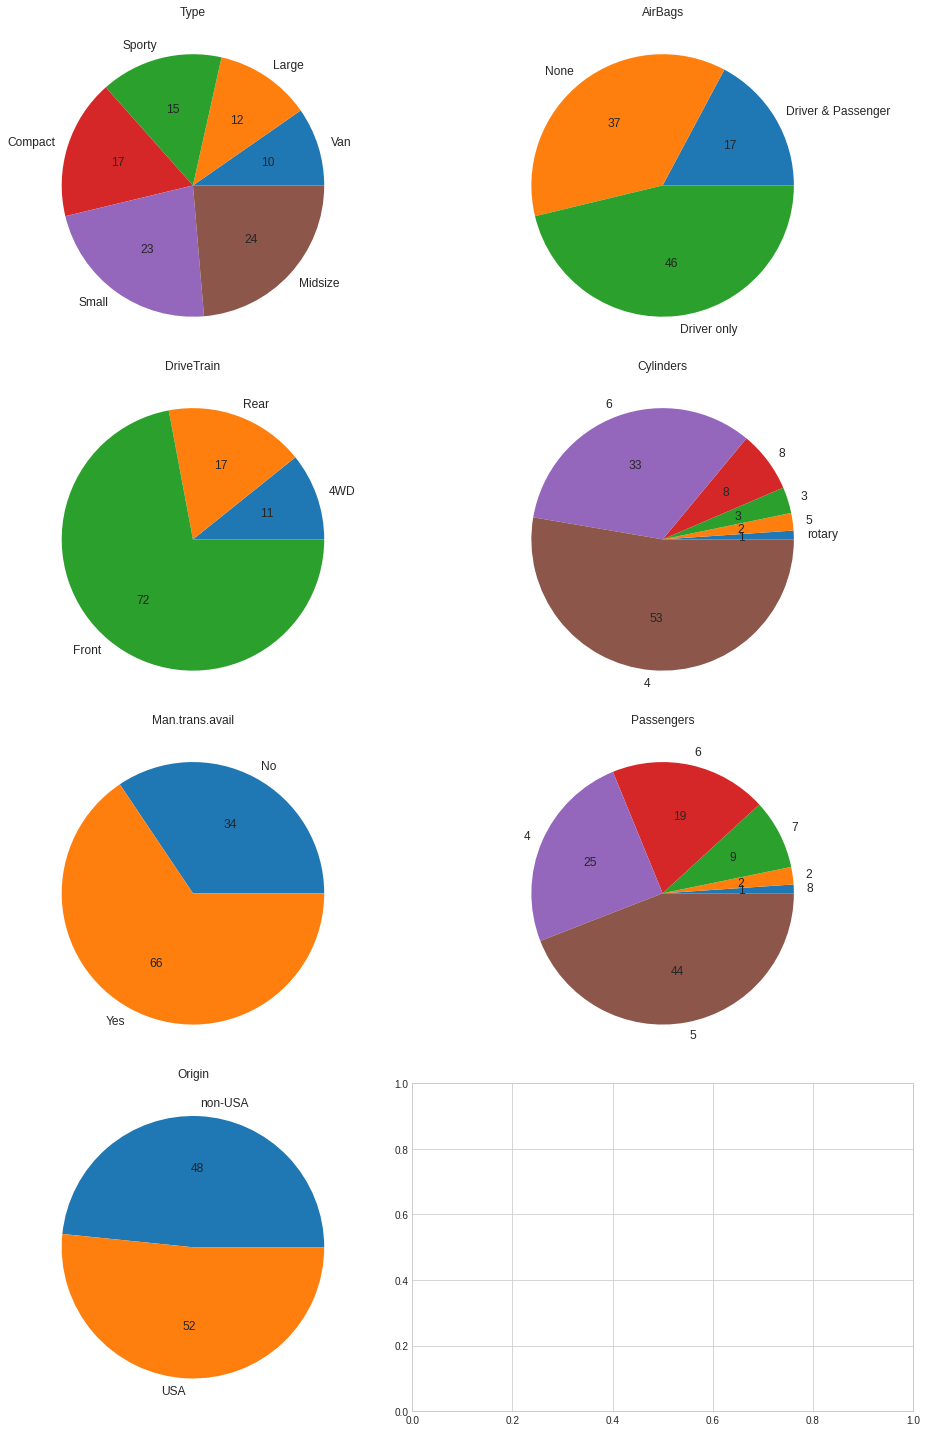

In [11]:

fig,axes = plt.subplots(4,2,figsize=(14,20))
axes=[ax for axes_row in axes for ax in axes_row]
for index ,col in enumerate(cars[cat_col]):
  _=cars[col].value_counts()[::-1].plot(kind="pie",
                                        ax=axes[index],
                                        title=col,
                                        autopct="%.0f",
                                        fontsize=12)
  _=axes[index].set_ylabel('')
_=plt.tight_layout()

> 1. Number of Smalland Midsize vehicle is more(~ 47%) as compared to other types ofvehicle.
2. AirBags aremostly available for Driver only along with there are the number of carsavailable without AirBag. There are only ~ 17% of cars available in themarket which provide airbags for both Driver and Passengers.
3. CaresManufacturers mostly prefer Front Driver Train as compared to Rear.There are ~11% of cars available in the market which are 4WD.
4. More than 50% ofthe vehicle use 4 cylinders engine and 33% of cars use 6 cylindersengine.
5. Mostly the capacityof carrying passengers is 4, 5, and 6.
6. In these datasetsboth the USA and Non-USA are available in the same proportion ie. Dataset isbalanced.

# Univariate Analysis- Countplot

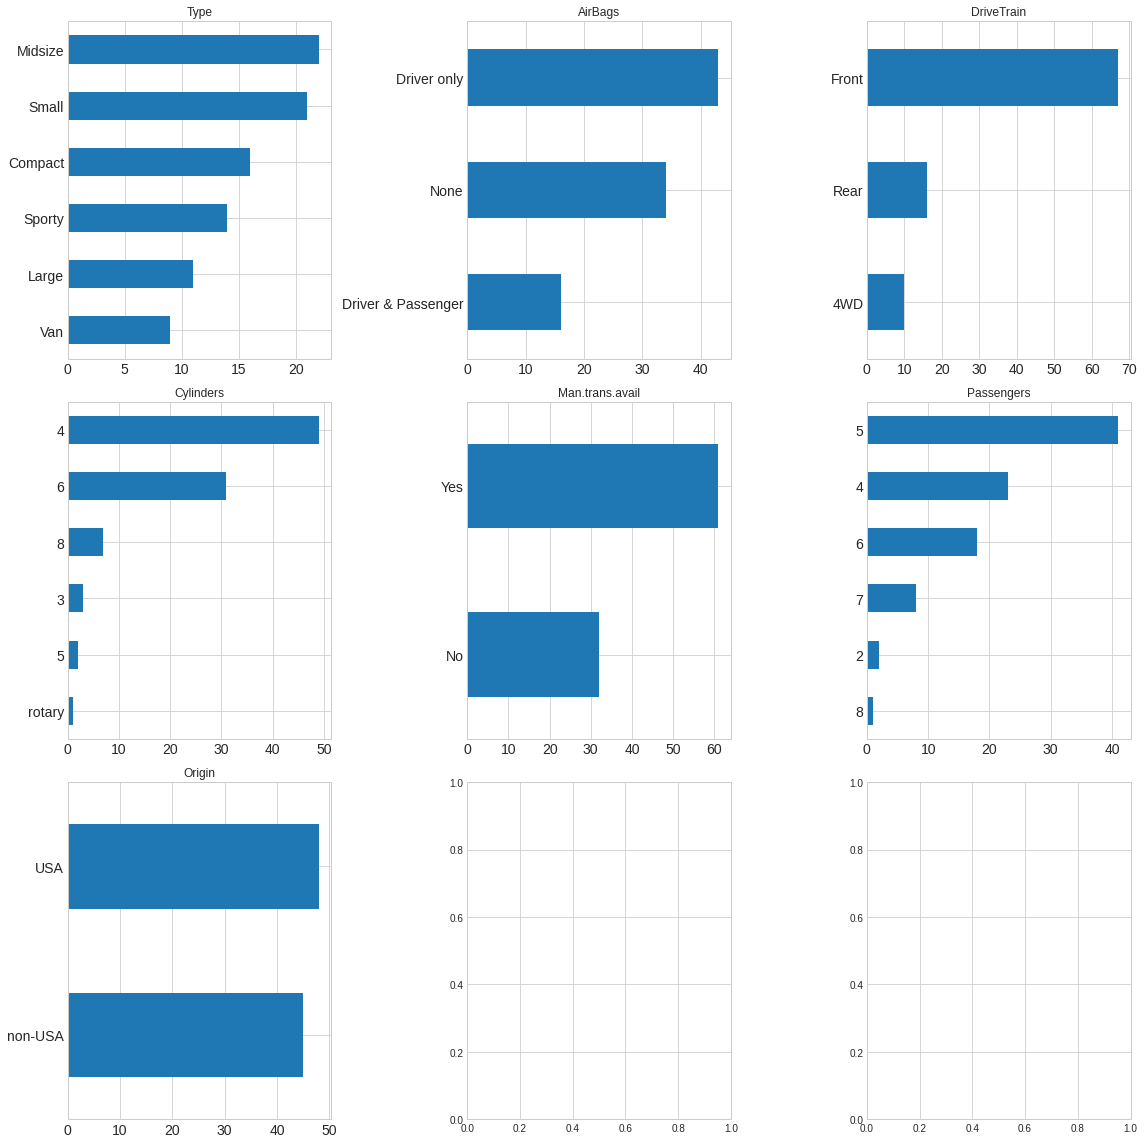

In [15]:
fig,axes=plt.subplots(3,3,figsize=(16,16))
axes=[ax for axes_row in axes for ax in axes_row]

for index,col in enumerate(cat_col):
  _ =cars[col].value_counts()[::-1].plot(kind = "barh",
                                         ax = axes[index],
                                         title=col,
                                         fontsize=14)
_=plt.tight_layout()

### Bivariant Relatioship with target.
Assume target is Origin 

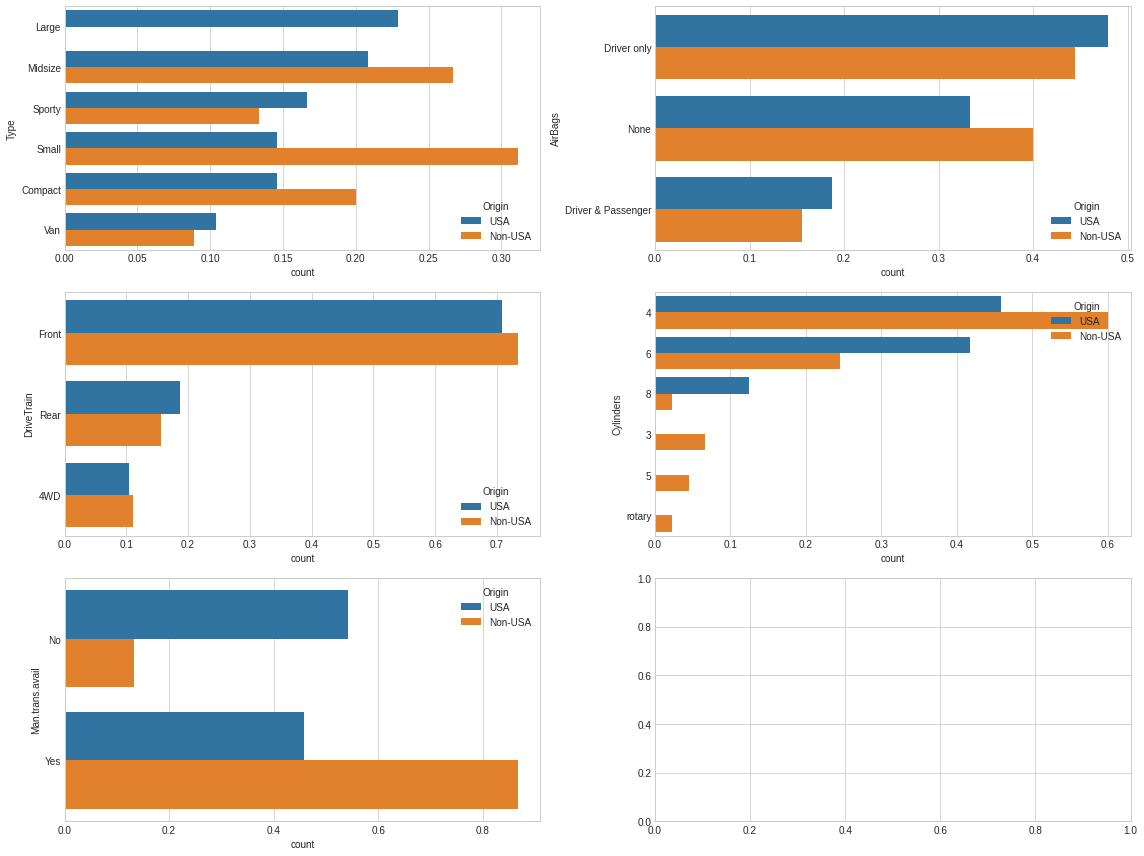

In [16]:
Target_Col="Origin"
fig,axes=plt.subplots(3,2,figsize=(16,12))
axes=[ax for axes_row in axes for ax in axes_row]

for index,col in enumerate(cars[cat_col[:-2]]):
  fltr=cars[Target_Col]=="USA"
  vc_usa=cars[fltr][col].value_counts(normalize=True).reset_index().rename({'index':col,col:'count'},axis=1)
  vc_nusa=cars[~fltr][col].value_counts(normalize=True).reset_index().rename({'index':col,col:'count'},axis=1)
  
  vc_usa[Target_Col]="USA"
  vc_nusa[Target_Col]="Non-USA"

  df=pd.concat([vc_usa,vc_nusa]).reset_index(drop=True)

  _=sns.barplot(y=col,x="count",data=df,hue=Target_Col,ax=axes[index])

_=plt.tight_layout()



> 1. In the given dataset,there are a number of large-type of vehicle available whose origin isthe USA but not single-vehicle available form Non-USA origin whosetype is large.
2. Non-USA basedcompanies mainly focus on the small, compact, and midsize vehicle ascompared to large, van, and sport.
3. From givendataset, its clear that in the USA, the airbag is important therefore a vehicle with air-bag is more in USA based companies as compared toNon-USA based companies.
4. USA originvehicle engine made up only 4 or 6 or 8 cylinders another variant isnot available.  

## Numerical Features

### Univariate Analysis
Boxplot can be used to see the spread of numerical variables and identify outliers.

In [28]:
# num_col
# print(len(num_col))
num_not_obj_col= cars[num_col].select_dtypes(exclude="object").columns

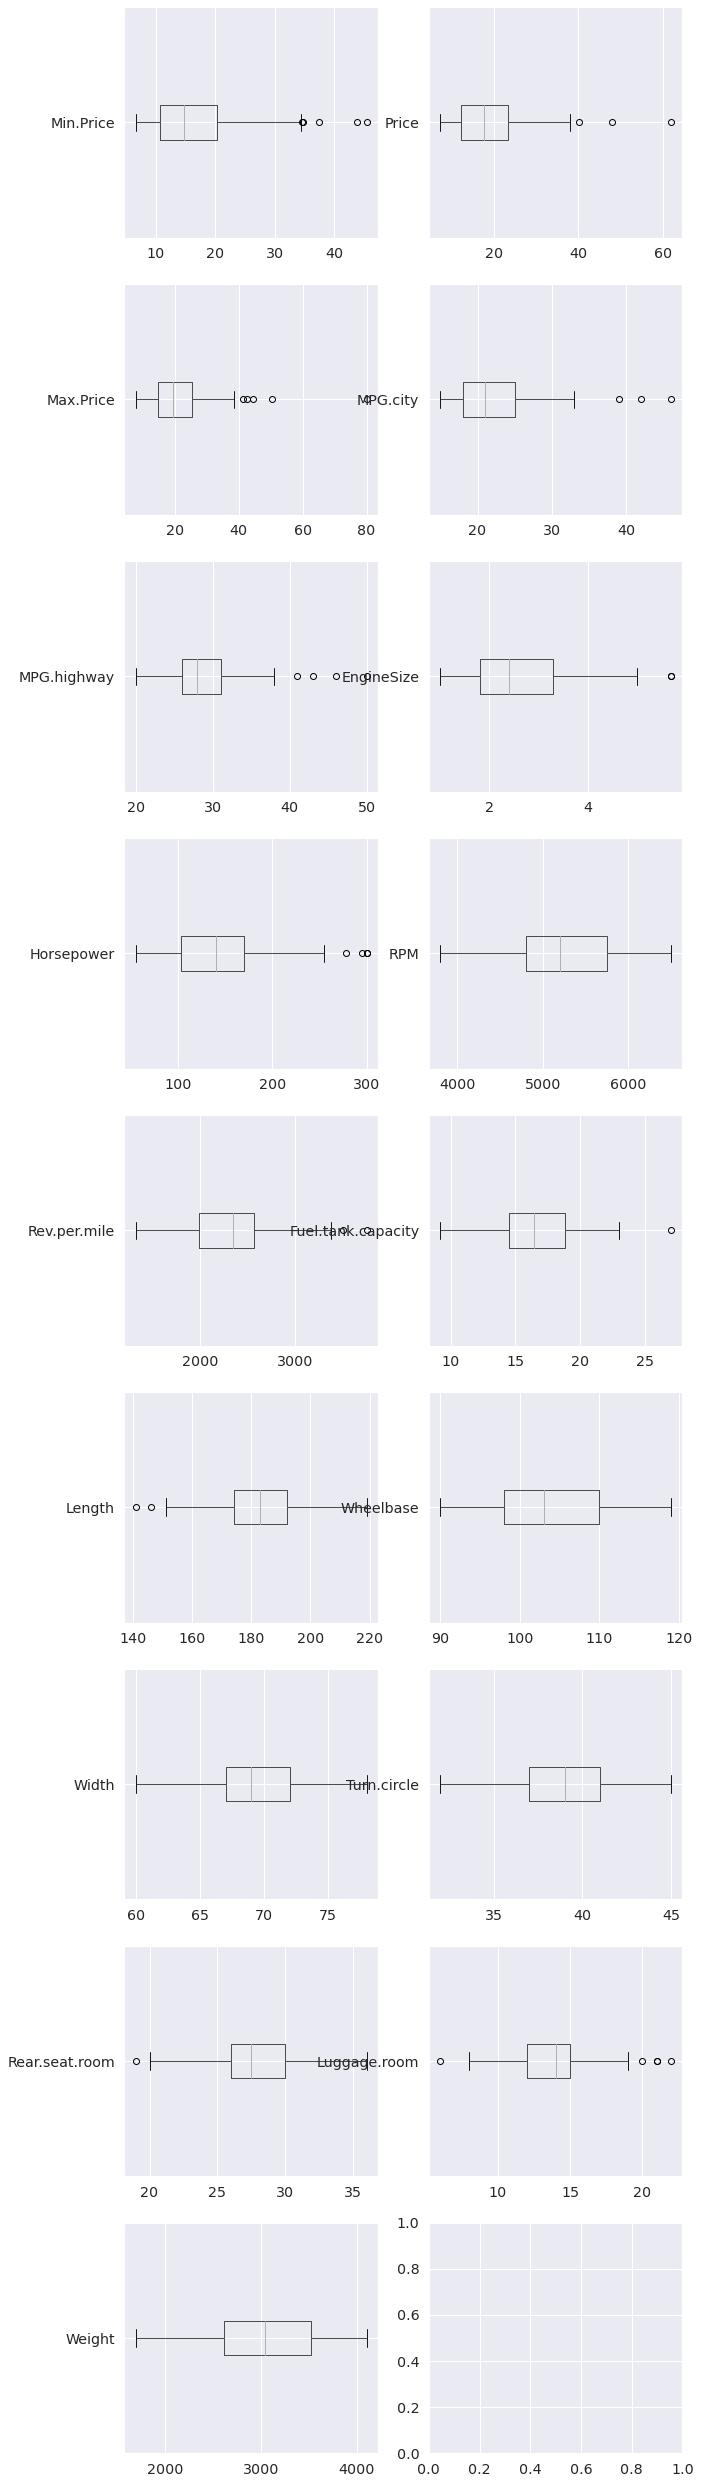

In [38]:
fig,axes=plt.subplots(9,2,figsize=(10,45))
axes=[ax for axes_row in axes for ax in axes_row]
for index,col in enumerate(num_not_obj_col):
  _=cars[[col]].boxplot(ax=axes[index],vert=False)
  

### Univariate Analysis- Density Plot

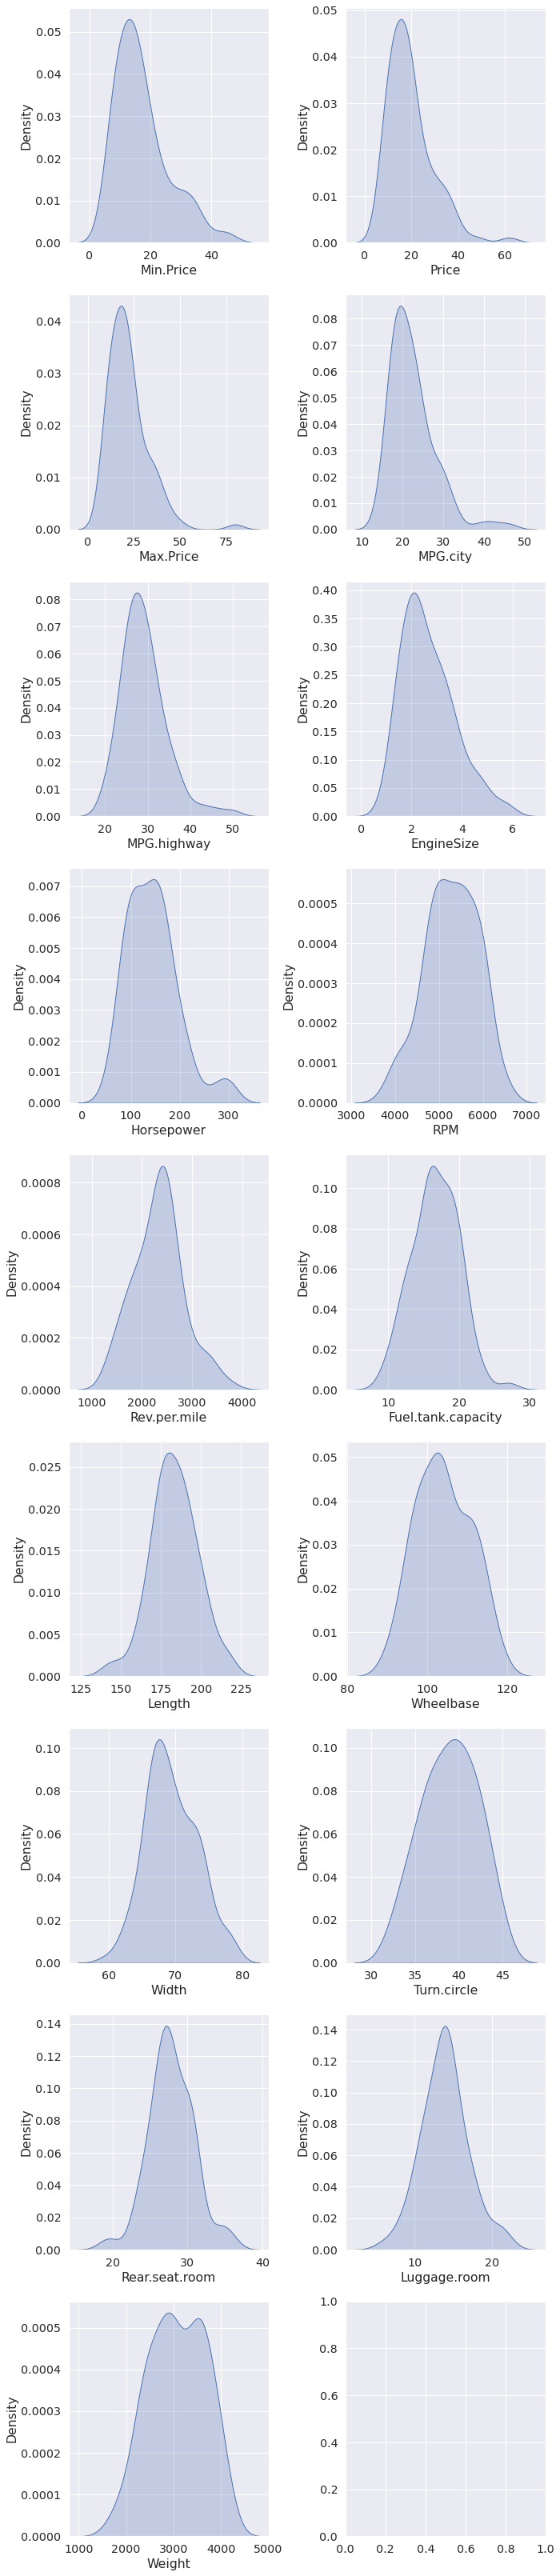

In [36]:
sns.set(font_scale=1.3)
fig,axes=plt.subplots(9,2,figsize=(10,45))
axes=[ax for axes_row in axes for ax in axes_row]
for index,col in enumerate(num_not_obj_col):
  plot=sns.kdeplot(data=cars,x=col,ax=axes[index],fill=True)
plt.tight_layout()

### Bivariate Analysis KDE Plot - Relationship with Target Variable

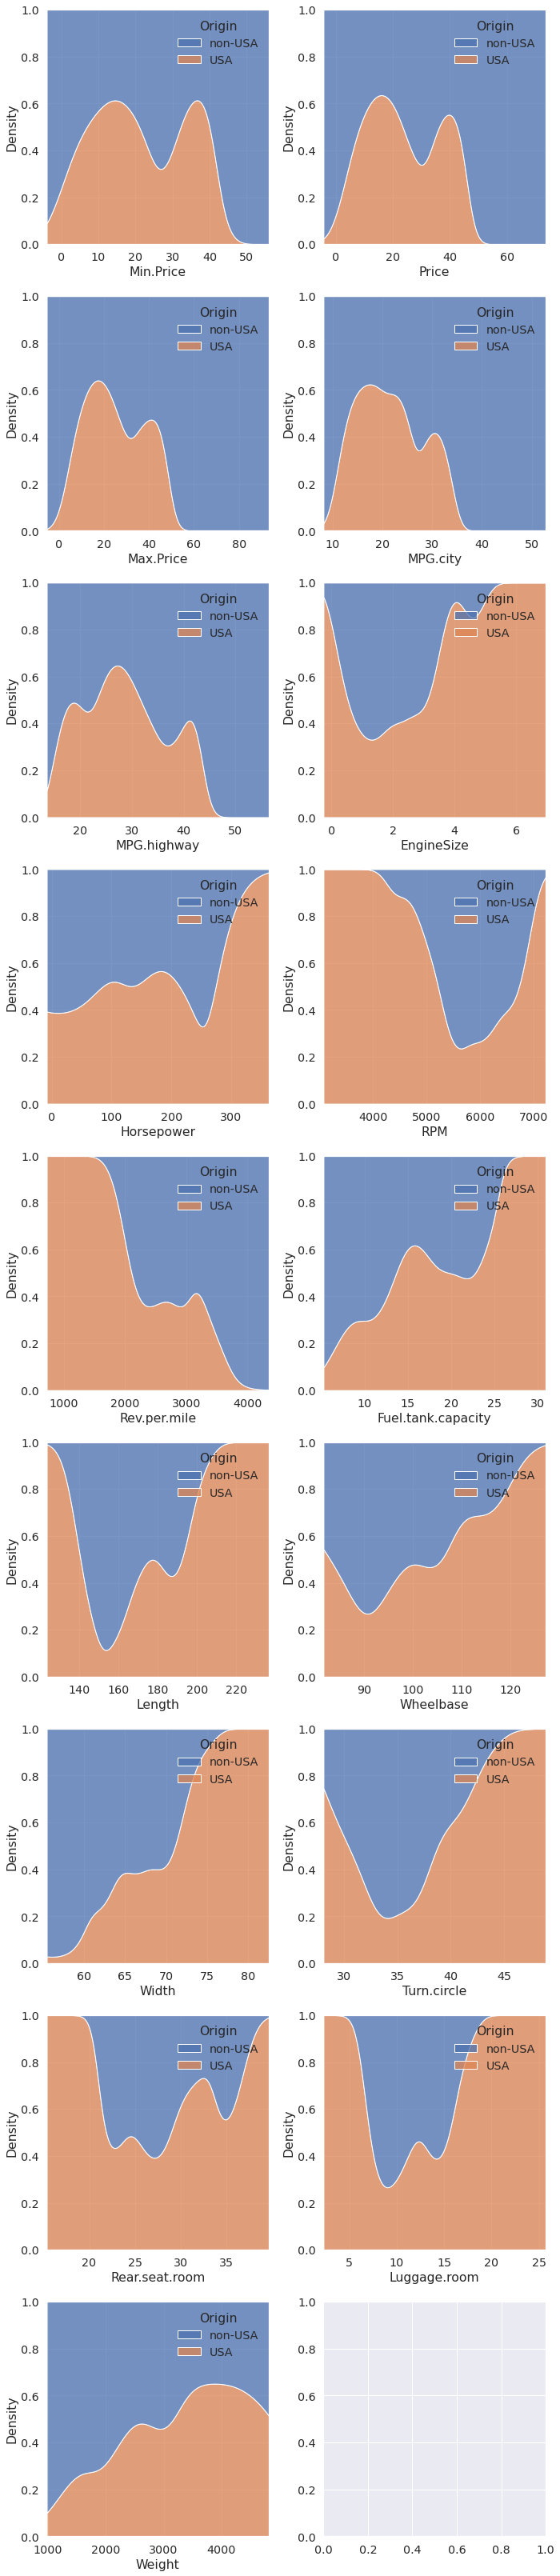

In [41]:
sns.set(font_scale=1.3)
fig,axes=plt.subplots(9,2,figsize=(10,45))
axes=[ax for axes_row in axes for ax in axes_row]
for index,col in enumerate (num_not_obj_col):
  plot=sns.kdeplot(data=cars,x=col,
                   ax=axes[index],
                   hue=Target_Col,
                   multiple='fill')
plt.tight_layout()

### Bivarient Analysis - Horizontal Barplots

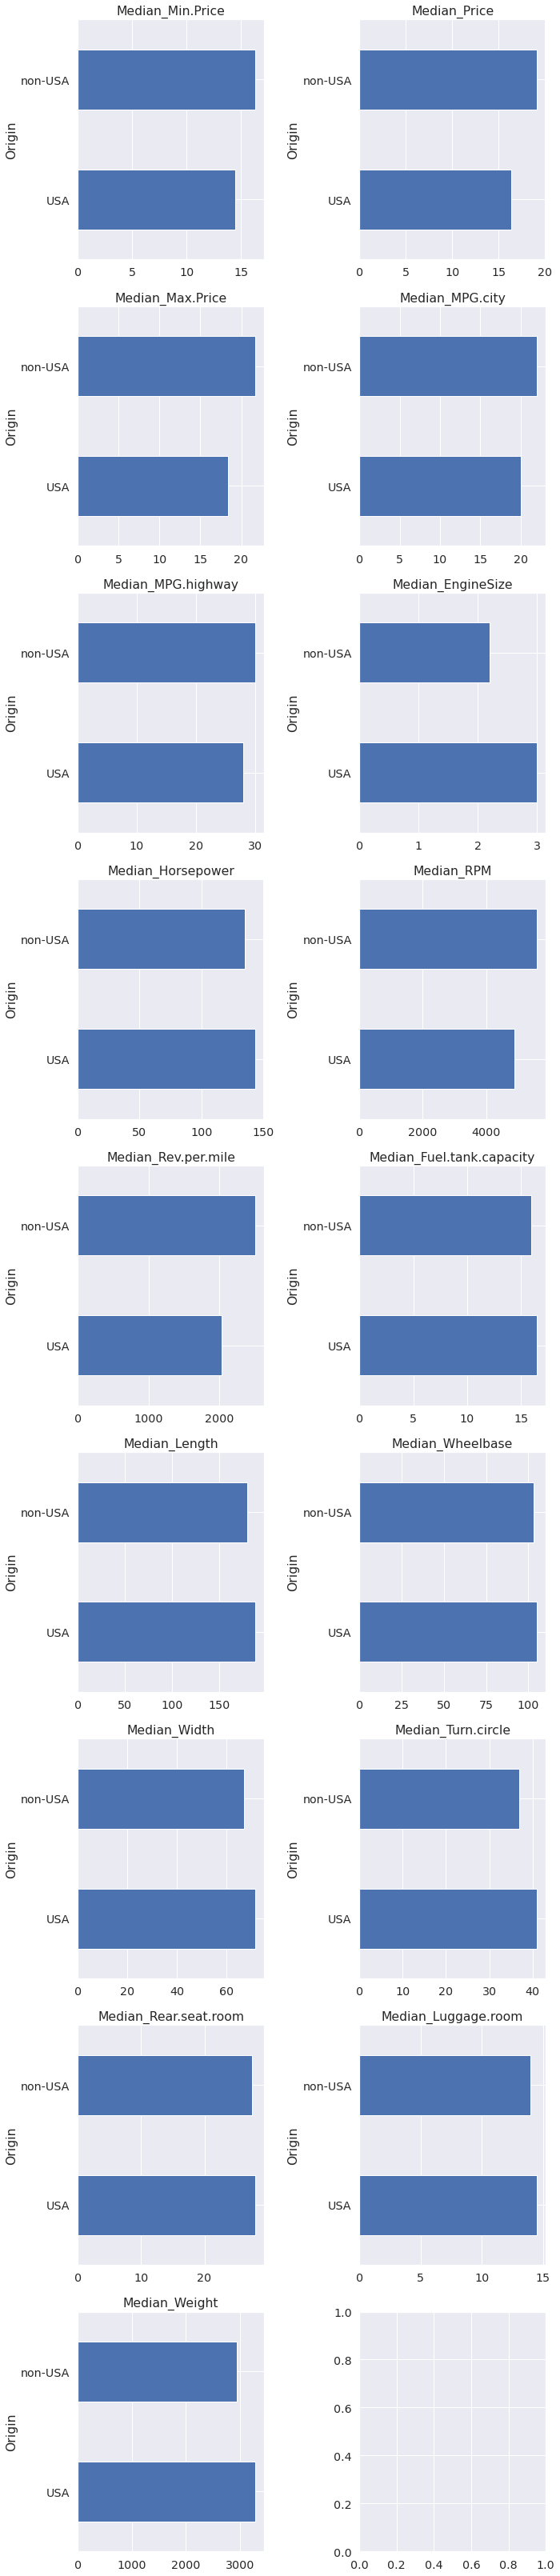

In [47]:
sns.set(font_scale=1.3)
fig,axes=plt.subplots(9,2,figsize=(10,45))
axes=[ax for axes_rows in axes for ax in axes_rows]
for index,col in enumerate(num_not_obj_col):
  plot=cars.groupby(Target_Col)[col].median().plot(
      kind='barh',title=f'Median_{col}',ax=axes[index])
plt.tight_layout()

# Conclusion
> EDA plays an important role in solving any kind of machine learning problem statement. 

> Due to EDA, we understand data in the detail.
We can easily see the importance of each variable w.r.t. target column.

> With the help of EDA, we can easily choose important parameters for prediction ie feature selection and eliminate unwanted columns which degred our model performance.